# GeoPandas: Create Polygon Layer

GeoPandas Documentation
- General: https://geopandas.org/docs.html
- Create GeoDataframe: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame
- Save to file: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html

Shapely Documentation
- General: https://shapely.readthedocs.io/en/stable/manual.html
- Polygon: https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html

## Task 1: Determine bounding box (BB) of Xanten.

Open QGIS and open the layer `dvg1gem_nw.shp`. Use `EPSG:25832`. Determine the bounding box of the municipality Xanten. Google how to do it.

What are the coordinates of the lower left (LL) and upper right (UR) corner, respectively?

LL --> 317215,362  5721035,066

UR --> 328192,073  5737002,181


In [1]:
minx = 317215.362
miny = 5721035.066
maxx = 328192.073
maxy = 5737002.181

In [2]:
import pandas as pd 
df = pd.read_csv("../data/derived/xanten_bounds.csv")

minx = df['MINX'][0]
miny = df['MINY'][0]
maxx = df['MAXX'][0]
maxy = df['MAXY'][0]

## Task 2: Create a rectangle (polygon) encompassing the BB.

The package shapely provides geometric object types such as Point, LineString, and Polygon. Look at the original shapely manual.

Create a Polygon which is the minumum polygon enccompassing the BB with corner coordinates being multiples of 1000.

In [3]:
import geopandas as gpd

In [4]:
from shapely.geometry import Polygon

In [5]:
minx = round(minx, -3)
miny = round(miny, -3)
maxx = round(maxx, -3)
maxy = round(maxy, -3)

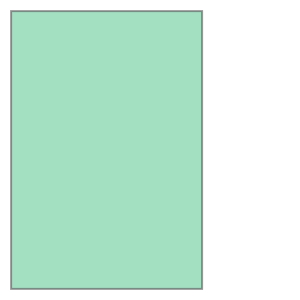

In [6]:
polygon=Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny)])
polygon

## Task 3: Create a GeoPandas Dataframe (gdf) with the correct CRS.

Create a gdf with the polygon as the geometry column and a string column in the format "E:{easting},N:{northing}" where you replae the place holders easting and northing with the actual coordinates of the LL corner.  

In [7]:
from shapely.geometry import Point
d = {'col1': ['name1', 'name2'], 'geometry': [Point(1, 2), Point(2, 1)]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
gdf

from shapely.geometry import Point
d = {'polygon_name': ['bounding box'], 'geometry': [polygon]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:25832")
gdf



,polygon_name,geometry
0,bounding box,"POLYGON ((317000.000 5721000.000, 317000.000 5..."


## Task 4: Save the layer

Save the layer in different file formats, e.g. shape file, GeoJSON, geopackage, etc.

Load the layer into QGIS and compare the results. Check the attribute table of your layer.

In [8]:
gdf.to_file("../data/derived/xanten_bb.shp") 
# this is done to save the file in the specific directory showed


#countries_gdf.to_file("countries.geojson", driver='GeoJSON')


#countries_gdf.to_file("package.gpkg", layer='countries', driver="GPKG")
#cities_gdf.to_file("package.gpkg", layer='cities', driver="GPKG")

C:\Users\tasio\AppData\Local\Temp\ipykernel_13004\267739768.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("../data/derived/xanten_bb.shp")
